In [23]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

In [24]:
# importing raw csv
tocm_df = pd.read_csv(Path("tocm_rank.csv"))
tocm_df.head()

,song,performer,song_id,time_on_chart,chart_debut
0,Heat Waves,Glass Animals,Heat WavesGlass Animals,91,2021-01-16
1,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,90,2019-12-14
2,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,87,2012-08-18
3,Sail,AWOLNATION,SailAWOLNATION,79,2011-09-03
4,I'm Yours,Jason Mraz,I'm YoursJason Mraz,76,2008-05-03


In [25]:
artist_count = tocm_df.groupby('performer').size().reset_index(name='Artist Count')
sorted=artist_count.sort_values("Artist Count", ascending=False)
#artist count > 1
sorted = sorted.loc[(sorted["Artist Count"] > 1) , :]
sorted

,performer,Artist Count
52,Morgan Wallen,5
15,Ed Sheeran,5
57,Post Malone,2
27,Imagine Dragons,2
40,Lifehouse,2
39,Lewis Capaldi,2
19,Faith Hill,2
78,Train,2
60,SZA,2


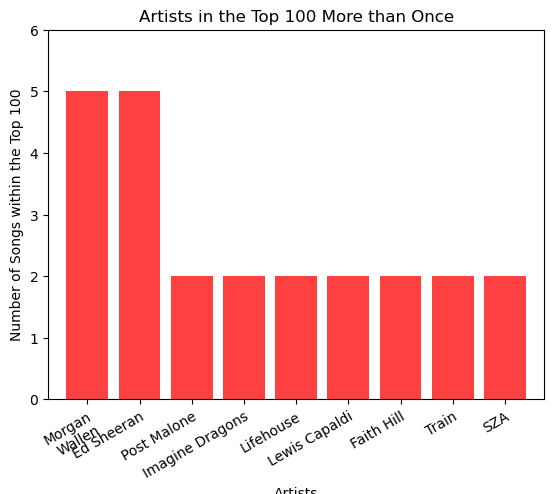

In [26]:
x_axis = np.arange(0, len(sorted["performer"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Artists in the Top 100 More than Once")
plt.xlabel("Artists")
plt.ylabel("Number of Songs within the Top 100")
plt.xlim(-0.75, len(sorted["performer"])-.25)
plt.ylim(0, max(sorted["Artist Count"]) + 1)
plt.bar(x_axis, sorted["Artist Count"], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, sorted["performer"])
plt.xticks(rotation=30, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("../output_data/artist_barchart.png")
plt.show()